# Data Analysis

* Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

This section allows me to explore some questions that may be arised with the dataset and help navigating through the research. 

In [1]:
# Imports 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os
import time
%matplotlib inline
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import processed data 
daily_19 = pd.read_csv("../processed_data/daily_summary_2019.csv").iloc[: , 1:]
daily_20 = pd.read_csv("../processed_data/daily_summary_2020.csv").iloc[: , 1:]

In [3]:
daily_19.sort_values(by = ['pickup_date'],inplace = True,ignore_index=True) # 2019 data was not sorted by date, but we can do it here
daily_19['pickup_date'] = pd.to_datetime(daily_19['pickup_date'])
daily_19

,pickup_date,trip_count_k,Average_Trip_Amount_USD,Average_Distance_in_Miles,Average_passenger_count
0,2019-01-01,181.31,16.574572,3.525538,1.714654
1,2019-01-02,189.53,16.203024,3.209825,1.630345
2,2019-01-03,213.60,15.612282,2.964163,1.602053
3,2019-01-04,225.13,15.114090,2.816055,1.614530
4,2019-01-05,227.22,14.035890,2.661787,1.677065
...,...,...,...,...,...
360,2019-12-27,161.21,19.152544,3.153261,1.670726
361,2019-12-28,164.34,18.982715,3.191547,1.711519
362,2019-12-29,157.15,19.167553,3.357803,1.691443
363,2019-12-30,165.96,18.592396,3.025486,1.618993


In [4]:
daily_20['pickup_date'] = pd.to_datetime(daily_20['pickup_date'])
daily_20 # 2020 data looks correct

,pickup_date,trip_count_k,Average_Trip_Amount_USD,Average_Distance_in_Miles,Average_passenger_count
0,2020-01-01,161.87,19.234755,3.470320,1.700407
1,2020-01-02,153.89,18.985798,3.235164,1.611065
2,2020-01-03,174.74,18.092626,2.926166,1.601062
3,2020-01-04,175.22,17.587971,2.917274,1.657967
4,2020-01-05,156.58,18.547160,3.273550,1.616082
...,...,...,...,...,...
361,2020-12-27,22.82,18.100744,3.317965,1.512663
362,2020-12-28,35.69,16.914437,2.769158,1.472390
363,2020-12-29,40.19,16.431964,2.569532,1.460088
364,2020-12-30,41.67,16.687008,2.616083,1.469162


### Q1. How does the daily trip numbers in 2020 compared to 2019?

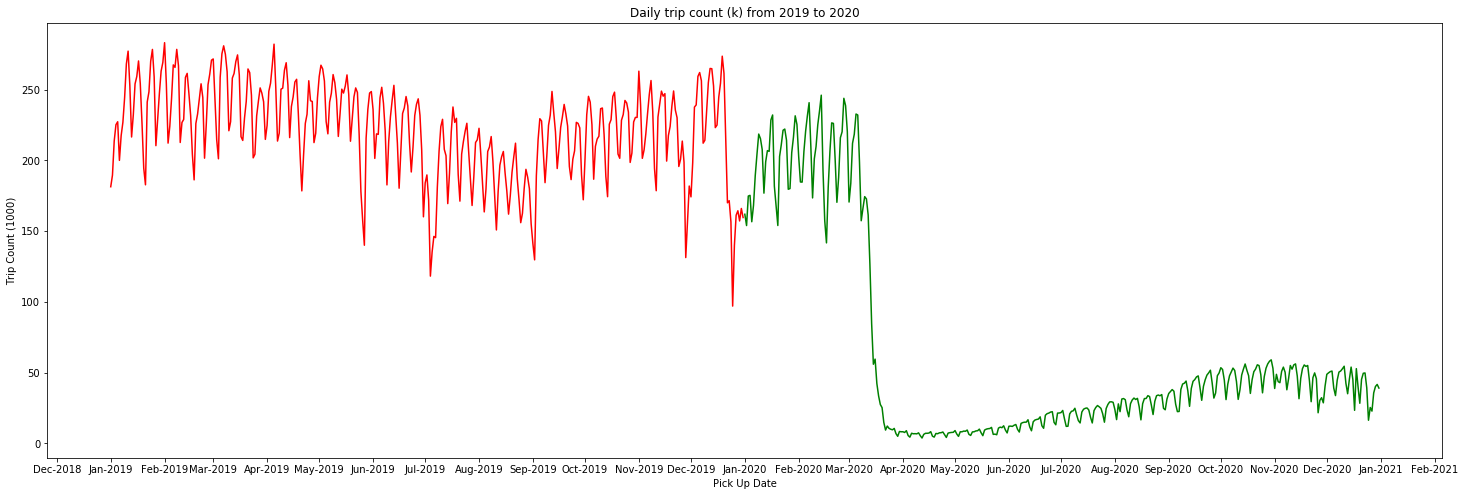

In [5]:
# Plot out the daily trip count (k) from 2019 to 2020
fig, ax = plt.subplots(figsize=(25,8))
sns.lineplot(x='pickup_date', y='trip_count_k', data=daily_19, ax=ax, color='r')
sns.lineplot(x='pickup_date', y='trip_count_k', data=daily_20, ax=ax, color='g')

ax.set_title("Daily trip count (k) from 2019 to 2020")
ax.set_ylabel("Trip Count (1000)")
ax.set_xlabel("Pick Up Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

plt.show()
fig.savefig("../plots/Daily trip count (k) from 2019 to 2020.png")

### Q2. How does taxi damand vary during the week?

In [6]:
# add feature day of week
daily_19['day_of_week'] = daily_19['pickup_date'].dt.day_name()
daily_19

,pickup_date,trip_count_k,Average_Trip_Amount_USD,Average_Distance_in_Miles,Average_passenger_count,day_of_week
0,2019-01-01,181.31,16.574572,3.525538,1.714654,Tuesday
1,2019-01-02,189.53,16.203024,3.209825,1.630345,Wednesday
2,2019-01-03,213.60,15.612282,2.964163,1.602053,Thursday
3,2019-01-04,225.13,15.114090,2.816055,1.614530,Friday
4,2019-01-05,227.22,14.035890,2.661787,1.677065,Saturday
...,...,...,...,...,...,...
360,2019-12-27,161.21,19.152544,3.153261,1.670726,Friday
361,2019-12-28,164.34,18.982715,3.191547,1.711519,Saturday
362,2019-12-29,157.15,19.167553,3.357803,1.691443,Sunday
363,2019-12-30,165.96,18.592396,3.025486,1.618993,Monday


In [7]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
daily_19['day_of_week'] = daily_19['day_of_week'].astype(cat_type)

demand_perdayofweek = daily_19.groupby('day_of_week')['trip_count_k'].sum().reindex(cats)
demand_perdayofweek.to_frame()

,trip_count_k
day_of_week,
Monday,10455.23
Tuesday,11829.48
Wednesday,12096.60
Thursday,12513.39
Friday,12376.72
Saturday,11569.31
Sunday,9968.39


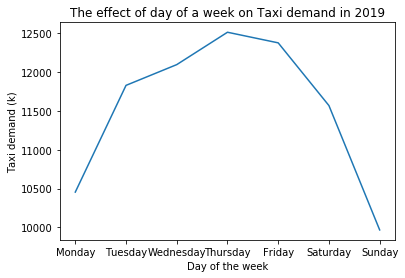

In [8]:
plt.plot(demand_perdayofweek.index, demand_perdayofweek)
plt.xlabel('Day of the week')
plt.ylabel('Taxi demand (k)')
plt.title('The effect of day of a week on Taxi demand in 2019')
plt.savefig('../plots/Effect_of_dayofweek_on_taxi_demand_19.png')
plt.show()

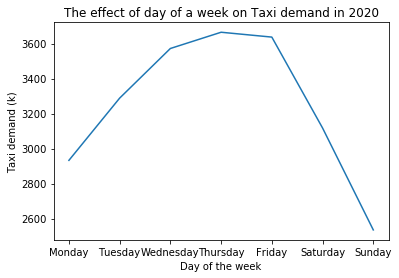

In [9]:
# do the same for 2020
daily_20['day_of_week'] = daily_20['pickup_date'].dt.day_name()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
daily_20['day_of_week'] = daily_20['day_of_week'].astype(cat_type)

demand_perdayofweek = daily_20.groupby('day_of_week')['trip_count_k'].sum().reindex(cats)
demand_perdayofweek.to_frame()

plt.plot(demand_perdayofweek.index, demand_perdayofweek)
plt.xlabel('Day of the week')
plt.ylabel('Taxi demand (k)')
plt.title('The effect of day of a week on Taxi demand in 2020')
plt.savefig('../plots/Effect_of_dayofweek_on_taxi_demand_20.png')
plt.show()

## Desciptive Statistics


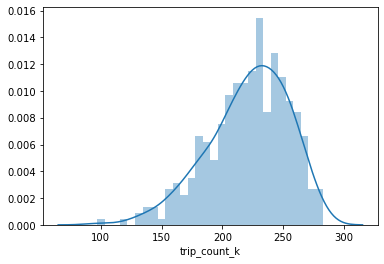

In [10]:
sns.distplot(daily_19['trip_count_k'], bins=30)

plt.show()

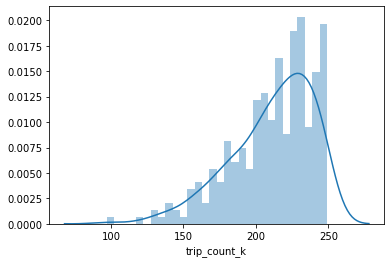

In [17]:
data = daily_19.loc[daily_19['trip_count_k'] <= 250, 'trip_count_k']

sns.distplot(data, bins=30)
plt.show()

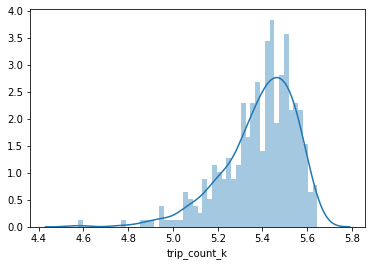

In [11]:
from numpy import log, sqrt

# apply a log transformation for all x non-zero x points, else 0
def logify(x):
    return log(x) if x else 0

sns.distplot(daily_19['trip_count_k'].apply(logify), bins=50)
plt.show()

In [12]:
# dataframes method that may be of use
MAX = daily_19['trip_count_k'].max()
MIN = daily_19['trip_count_k'].min()
SD = daily_19['trip_count_k'].std()
IQR = daily_19['trip_count_k'].quantile()
N = len(daily_19)

In [13]:
def sturges(x):
    from numpy import log2
    return int(log2(x)) + 1

def rice(x):
    return int(2 * x ** (1/3))

def scott(large, small, sd, x):
    return int((large - small) / (3.5 * (sd/x ** (1/3))))

def freedman(large, small, iqr, x):
    return int((large - small) / (2 * (iqr/x ** (1/3))))
    
def square(x):
    return int(sqrt(x))

def logify(x):
    return log(x) if x else 0

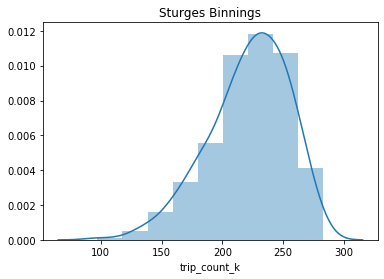

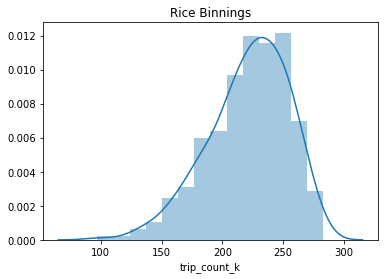

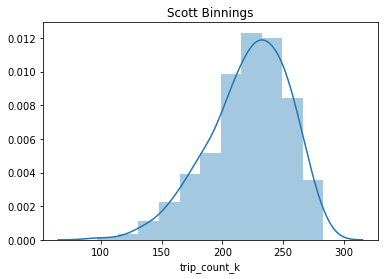

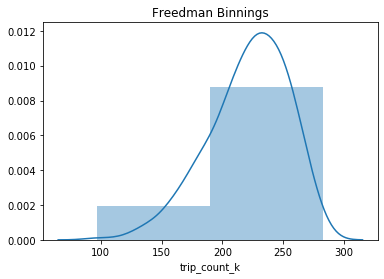

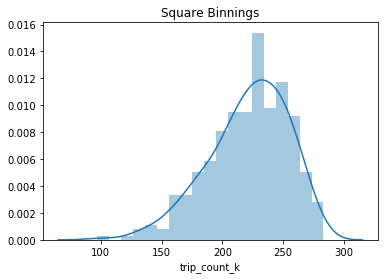

In [14]:
fig1 = sns.distplot(daily_19['trip_count_k'], bins=sturges(N))
plt.title("Sturges Binnings")
plt.show()

fig2 = sns.distplot(daily_19['trip_count_k'], bins=rice(N))
plt.title("Rice Binnings")
plt.show()

fig3 = sns.distplot(daily_19['trip_count_k'], bins=scott(MAX, MIN, SD, N))
plt.title("Scott Binnings")
plt.show()

fig4 = sns.distplot(daily_19['trip_count_k'], bins=freedman(MAX, MIN, IQR, N))
plt.title("Freedman Binnings")
plt.show()

fig5 = sns.distplot(daily_19['trip_count_k'], bins=square(N))
plt.title("Square Binnings")
plt.show()

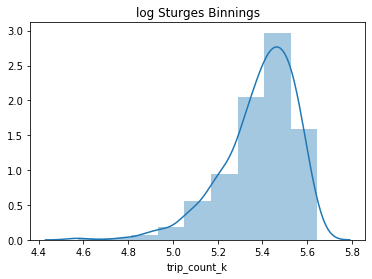

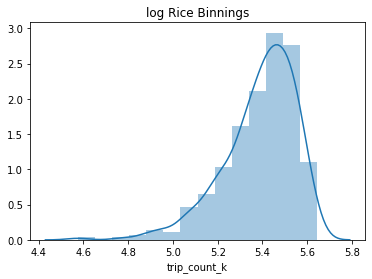

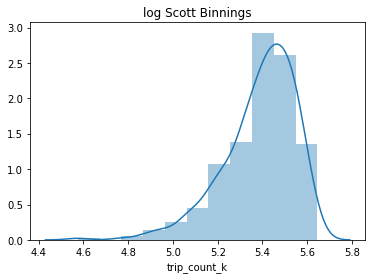

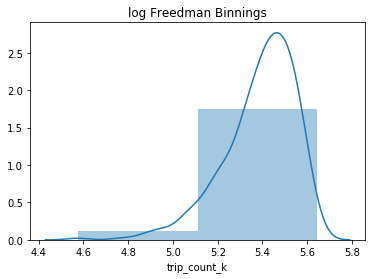

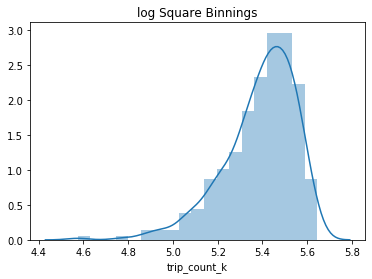

In [21]:
fig1 = sns.distplot(daily_19['trip_count_k'].apply(logify), bins=sturges(N)) ## looks better
plt.title("log Sturges Binnings")
plt.show()

fig2 = sns.distplot(daily_19['trip_count_k'].apply(logify), bins=rice(N)) ## a bit horrible 
plt.title("log Rice Binnings")
plt.show()

fig3 = sns.distplot(daily_19['trip_count_k'].apply(logify), bins=scott(MAX, MIN, SD, N)) ## not nice 
plt.title("log Scott Binnings")
plt.show()

fig4 = sns.distplot(daily_19['trip_count_k'].apply(logify), bins=freedman(MAX, MIN, IQR, N)) ## not nice 
plt.title("log Freedman Binnings")
plt.show()

fig5 = sns.distplot(daily_19['trip_count_k'].apply(logify), bins=square(N)) ## not so well 
plt.title("log Square Binnings")
plt.show()